In [1]:
from os import path
import numpy as np
import pandas as pd
from IPython.display import display

if all([path.exists("data/ready/{}.csv".format(file)) for file in ["AlbumData", "ArtistData", "CompleteStreamingHistory", "FullEpisodeData", "FullTrackData", "TrackFeatureData"]]):
    album_data_df = pd.read_csv("data/ready/AlbumData.csv")
    album_data_df.drop(album_data_df.columns[0], axis=1, inplace=True)
    artist_data_df = pd.read_csv("data/ready/ArtistData.csv")
    artist_data_df.drop(artist_data_df.columns[0], axis=1, inplace=True)
    complete_streaming_history_df = pd.read_csv("data/ready/CompleteStreamingHistory.csv")
    complete_streaming_history_df.drop(complete_streaming_history_df.columns[0], axis=1, inplace=True)
    full_episode_data_df = pd.read_csv("data/ready/FullEpisodeData.csv")
    full_episode_data_df.drop(full_episode_data_df.columns[0], axis=1, inplace=True)
    full_track_data_df = pd.read_csv("data/ready/FullTrackData.csv")
    full_track_data_df.drop(full_track_data_df.columns[0], axis=1, inplace=True)
    track_feature_data_df = pd.read_csv("data/ready/TrackFeatureData.csv")
    track_feature_data_df.drop(track_feature_data_df.columns[0], axis=1, inplace=True)
    print("Data ready for analysis")
else:
    print("Run feature analysis from other journal before continuing")

/home/jcroderman/.pyenv/versions/3.7.5/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Data ready for analysis


## The Data
Let's explore some of the datasets we have access to:

In [2]:
print(complete_streaming_history_df.shape[0])
complete_streaming_history_df.head(3)

25593


,date,time,type,id,ms_played
0,2021-01-01,00:04:00,track,3zl7j5ua8mF4JDYuxrfo01,16889
1,2021-01-01,00:04:00,track,3XBDyDl3lwihZ8taFqMsJa,181455
2,2021-01-01,00:09:00,track,49soGZl5uftZH9E7T20SDm,246213


### CompleteStreamingHistory
This dataset is mostly what we got from spotify, describing the id of the track or podcast episode listened to at what time, and how long it was listened to.
* date - The date listened to the track or episode in 2021
* time - The time at the end of the track
* type - `track` if the track listened to was a song, `episode` if it was a podcast episode
* id - The track ID of the track described (not completely accurate, since Spotify did not provide these ids)
* ms_played - How long the specified track was listened to

In [3]:
print(full_track_data_df.shape[0])
full_track_data_df.head(3)

5234


,id,album_id,album_name,album_release_date,album_total_tracks,artist_ids,artist_names,duration_ms,explicit,name,popularity,track_number,genres
0,3zl7j5ua8mF4JDYuxrfo01,2MOs2gBy14kW9jYXbv2A3O,Perfect Symphony (Ed Sheeran & Andrea Bocelli),2017-12-15,1,"['6eUKZXaKkcviH0Ku9w2n3V', '3EA9hVIzKfFiQI0Kik...","['Ed Sheeran', 'Andrea Bocelli']",265363,False,Perfect Symphony (Ed Sheeran & Andrea Bocelli),70,1,"['classical tenor', 'italian tenor', 'operatic..."
1,3XBDyDl3lwihZ8taFqMsJa,3LjEwG1UMyjrH13rrMmdco,A Little Lift,2019-03-29,12,['5hPR4Atp3QY2ztiAcz1inl'],['Morningsiders'],181454,False,Honey Hold Me,45,3,"['stomp and holler', 'folk-pop', 'indiecoustica']"
2,49soGZl5uftZH9E7T20SDm,6Rt2NlqIHMj7xanrfhRgTl,Call It Home: Vol. 1 & 2,2018-04-06,16,['21t0aavYGSGFkYYFhu6urk'],['The California Honeydrops'],246213,False,Only Home I've Ever Known,41,1,"['modern funk', 'deep new americana', 'bay are..."


### FullTrackData
This dataset is a listing of all tracks listened to during the year, and the full list of features obtained through Spotify's `tracks` endpoint
* id - The track ID of the track described
* album_id - The ID of the album that the track is on (may not be entirely accurate, this was obtained from a best-guess procedure)
* album_name - The name of the album the track appears on
* album_release_date - The date of release of the album (may not be entirely accurate, some data is only accurate to year, some to month, some to day)
* album_total_tracks - The total number of tracks on the album
* artist_ids - A list of all the ids of artists on the track
* artist_names - A list of names of all the artists on the track
* duration_ms - How long the track lasts in ms
* explicit - If true, song is explicit
* name - Name of the track
* popularity - How popular a track is, based on Spotify's proprietary popularity algorithm
* track_number - The index of the track on its album
* genres - A list of the approximate genres that the track belongs to (some tracks do not have genre information)

In [4]:
print(track_feature_data_df.shape[0])
track_feature_data_df.head(3)

5234


,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,boringness
0,3zl7j5ua8mF4JDYuxrfo01,0.544,0.417,8,-4.387,1,0.0247,0.586,0.00000,0.085,0.207,95.156,3,186.869
1,3XBDyDl3lwihZ8taFqMsJa,0.606,0.567,0,-6.841,1,0.0268,0.367,0.00325,0.190,0.521,82.012,4,192.471
2,49soGZl5uftZH9E7T20SDm,0.472,0.516,3,-8.945,1,0.0537,0.718,0.00175,0.140,0.481,96.407,4,186.262


### TrackFeatureData
This dataset is a listing of all tracks listened to during the year, along with all of the features obtained through Spotify's `audio-features` endpoint. This contains data calculated by Spotify with their proprietary algorithms. (Descriptions come directly from Spotify)
* id - The track ID of the track described
* danceability - Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity
* energy - A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy
* key - The key the track is in (0 = C, 1 = C#/Db, etc.)
* loudness - The overall loudness of a track in decibels (dB)
* mode - Indicates the modality (major or minor) of a track (0 = Major, 1 = Minor)
* speechiness - Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value
* instrumentalness - Predicts whether a track contains no vocals
* liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live
* valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive
* tempo - The overall estimated tempo of a track in beats per minute (BPM)
* time_signature - An estimated overall time signature of a track
* boringness - An arbitrary score calculated from an equation from [this article](https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de) that shows how boring a track is

In [5]:
print(album_data_df.shape[0])
album_data_df.head(3)

2643


,id,album_type,artist_ids,artist_names,copyright_texts,genres,image_url,label,name,popularity,release_date,total_tracks
0,2MOs2gBy14kW9jYXbv2A3O,single,"['6eUKZXaKkcviH0Ku9w2n3V', '3EA9hVIzKfFiQI0Kik...","['Ed Sheeran', 'Andrea Bocelli']","['© 2017 Asylum Records UK, a division of Atla...",[],https://i.scdn.co/image/ab67616d0000b273baf909...,Atlantic Records UK,Perfect Symphony (Ed Sheeran & Andrea Bocelli),63,2017-12-15,1
1,3LjEwG1UMyjrH13rrMmdco,album,['5hPR4Atp3QY2ztiAcz1inl'],['Morningsiders'],"['© 2019 Morningsiders, LLC under exclusive li...",[],https://i.scdn.co/image/ab67616d0000b2733cdceb...,Nettwerk Records,A Little Lift,55,2019-03-29,12
2,6Rt2NlqIHMj7xanrfhRgTl,album,['21t0aavYGSGFkYYFhu6urk'],['The California Honeydrops'],"['2018 The California Honeydrops', '2018 The C...",[],https://i.scdn.co/image/ab67616d0000b273958282...,Tubtone Records,Call It Home: Vol. 1 & 2,49,2018-04-06,16


### AlbumData
This dataset is a listing of all albums of the tracks listened to during the year, along with all of the features obtained through Spotify's `album` endpoint.
* id - The album ID of the album described
* album_type - The type of album it is (album, compilation, single) (may not be accurate)
* artist_ids - List of ids of major artists on the album
* artist_names - List of names of major artists on the album
* copyright_texts - Copyrights of the album
* genres - A list of the approximate genres that the track belongs to (some tracks do not have genre information)
* image_url - URL of the album image
* label - Record label of the album
* name - Name of the album
* popularity - Popularity of the album based on Spotify's proprietary popularity algorithm
* release_date - The date of release of the album (may not be entirely accurate, some data is only accurate to year, some to month, some to day)
* total_tracks - The total number of tracks on the album

In [6]:
print(artist_data_df.shape[0])
artist_data_df.head(3)

2373


,id,genres,name,popularity
0,6eUKZXaKkcviH0Ku9w2n3V,"['pop', 'uk pop']",Ed Sheeran,97
1,3EA9hVIzKfFiQI0Kikz2wo,"['classical tenor', 'italian tenor', 'operatic...",Andrea Bocelli,74
2,5hPR4Atp3QY2ztiAcz1inl,"['folk-pop', 'indiecoustica', 'stomp and holler']",Morningsiders,48


### ArtistData
This dataset is a listing of all artists of the tracks listened to during the year, along with all of the features obtained through Spotify's `artist` endpoint.
* id - The artist ID of the artist described
* genres - A list of the approximate genres that the track belongs to (some tracks do not have genre information)
* name - Name of the artist
* popularity - Popularity of the artist based on Spotify's proprietary popularity algorithm

In [7]:
print(full_episode_data_df.shape[0])
full_episode_data_df.head(3)

880


,id,description,duration_ms,explicit,image_url,name,release_date,show_id,show_copyright_texts,show_description,show_explicit,show_image_url,show_name,show_publisher,show_total_episodes
0,4vqMyjMPaLZc06BBSzBEk3,Mike tells Sarah what makes older Americans mo...,3318569,False,https://i.scdn.co/image/ab6765630000ba8a557189...,Losing Relatives to Fox News,2020-12-07,1RefFgQB4Lrl7qczcTWA3o,[],Sarah is a journalist obsessed with the past. ...,True,https://i.scdn.co/image/ab6765630000ba8a557189...,You're Wrong About,Sarah Marshall,150
1,3L7WxMTjXmSzhGncCUIIJ6,Mike tells Sarah the complicated story of an o...,4258926,False,https://i.scdn.co/image/ab6765630000ba8a557189...,The Stanford Prison Experiment,2020-12-21,1RefFgQB4Lrl7qczcTWA3o,[],Sarah is a journalist obsessed with the past. ...,True,https://i.scdn.co/image/ab6765630000ba8a557189...,You're Wrong About,Sarah Marshall,150
2,5uqoeTTKOPlXKkcNGrSMpb,Timmy the Tooth Haunts My Dreams: https://bit....,4064235,False,https://i.scdn.co/image/ab6765630000ba8a6ef102...,100: The 100th Episode of the Podcast! - The G...,2020-12-28,0itVSZMhztCXlbissOQV44,[],The Gus & Eddy Podcast is a weekly show starri...,True,https://i.scdn.co/image/ab6765630000ba8a6ef102...,The Gus & Eddy Podcast,Gus & Eddy,135


### FullEpisodeData
This dataset is a listing of all podcast episodes listened to during the year along with their show, and the full list of features obtained through Spotify's `episodes` endpoint
* id - The episode ID of the episode described
* description - The description associated with the episode
* duration_ms - How long the episode lasts in ms
* explicit - If true, episode is explicit
* image_url - The url of the episode's image
* name - Name of the episode
* release_date - Release date of the episode
* show_id - The ID of the show that the episode belongs to
* show_copyright_texts - A list of all copyrights associated with the show
* show_explicit - If true, show is explicit
* show_image_url - The url of the show's image
* show_name - Name of the show
* show_publisher - Publisher of the show
* show_total_episodes - Number of total episodes released by this show at time of procurement (January 27, 2021)

## Analysis
Let's do some analysis!

In [8]:
total_music_ms = complete_streaming_history_df[complete_streaming_history_df["type"] == "track"]["ms_played"].sum()
total_music_sec = total_music_ms / 1000
total_music_min = total_music_sec / 60
total_music_hour = total_music_min / 60
print("Hours I have listened to music on Spotify: {:.3f} hours ({:.3f} days)".format(total_music_hour, total_music_hour / 24))
total_podcast_ms = complete_streaming_history_df[complete_streaming_history_df["type"] == "episode"]["ms_played"].sum()
total_podcast_sec = total_podcast_ms / 1000
total_podcast_min = total_podcast_sec / 60
total_podcast_hour = total_podcast_min / 60
print("Hours I have listened to podcasts on Spotify: {:.3f} hours ({:.3f} days)".format(total_podcast_hour, total_podcast_hour / 24))

Hours I have listened to music on Spotify: 1107.151 hours (46.131 days)
Hours I have listened to podcasts on Spotify: 390.855 hours (16.286 days)


In [9]:
# Setup

import math
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
register_matplotlib_converters()
rcParams['figure.figsize'] = 18.5, 7.5
rcParams['font.size'] = 16

ms_to_minutes = 1000 * 60
ms_to_hours = ms_to_minutes * 60
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [10]:
complete_streaming_history_df["month"] = complete_streaming_history_df["date"].apply(lambda date: int(date[5:7]))
complete_streaming_history_df["day"] = complete_streaming_history_df["date"].apply(lambda date: int(date[8:10]))
month_range = [complete_streaming_history_df["month"].min(), complete_streaming_history_df["month"].max()]
month_range

[1, 12]

We'll use this to fill in empty dates:

In [11]:
thirty_one_day_months = [1, 3, 5, 7, 8, 10, 12]
full_year_arr = [["2021-{:02}-{:02}".format(month, day), 0, int(month), int(day)]
                 for month in range(1, 13)
                 for day in range(1, 32 if month in thirty_one_day_months else 31 if month != 2 else 30)]
full_year_df = pd.DataFrame(full_year_arr, columns=["date", "ms_played", "month", "day"])
full_year_df = full_year_df[full_year_df["date"] >= "2021-{:02}-01".format(month_range[0])]
if month_range[1] < 12:
    full_year_df = full_year_df[full_year_df["date"] < "2021-{:02}-01".format(month_range[1] + 1)]
full_year_df = full_year_df.reset_index(drop=True)

full_year_df.head()

,date,ms_played,month,day
0,2021-01-01,0,1,1
1,2021-01-02,0,1,2
2,2021-01-03,0,1,3
3,2021-01-04,0,1,4
4,2021-01-05,0,1,5


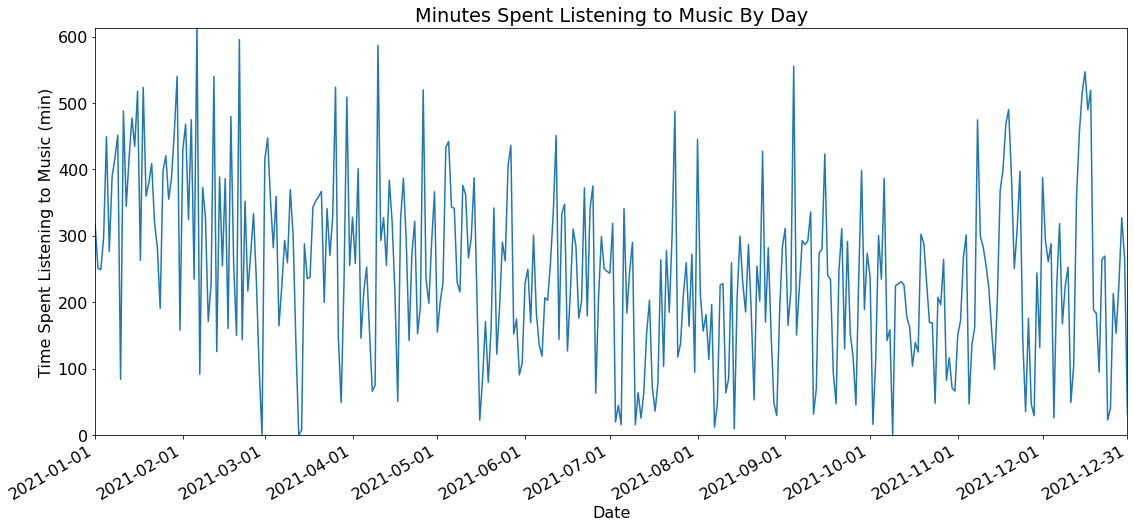

In [12]:
def show_minutes_spent_listening_to_music_by_day(data):
    plt.plot(data[:,0], data[:,1])
    plt.title("Minutes Spent Listening to Music By Day")
    plt.xlabel("Date")
    plt.xticks(["2021-{:02}-01".format(month) for month in range(month_range[0], month_range[1] + 1)] + [data[len(data)-1,0]], ha='right')
    plt.xticks(rotation=30)
    plt.ylabel("Time Spent Listening to Music (min)")
    plt.margins(0)

data = complete_streaming_history_df[["date", "ms_played"]].groupby(["date"]).sum().apply(lambda x: x / ms_to_minutes)
full_year_copy_df = full_year_df[["date", "ms_played"]].copy().set_index("date")
full_year_copy_df.update(data)
data = full_year_copy_df.reset_index().to_numpy()
show_minutes_spent_listening_to_music_by_day(data)

plt.show()

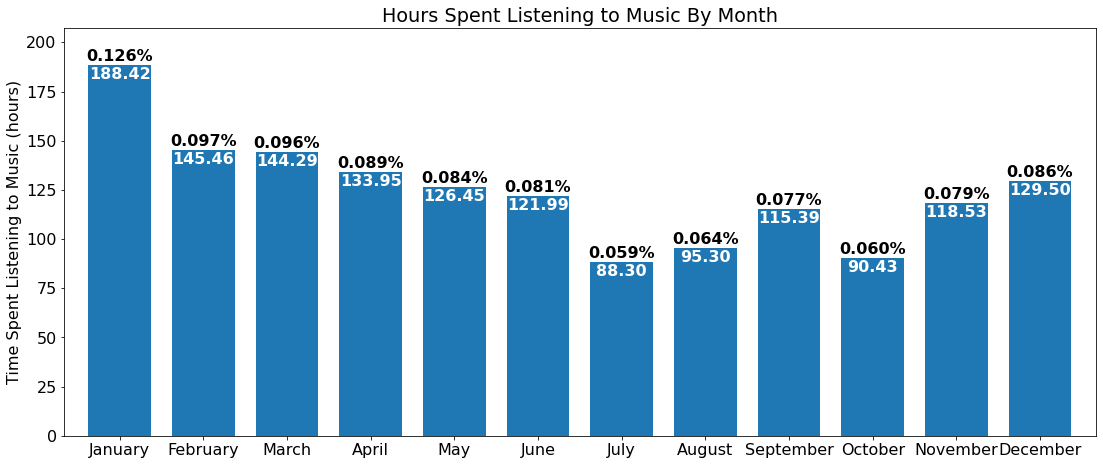

In [13]:
def show_minutes_spent_listening_to_music_by_month(data):
    fig, ax = plt.subplots()
    width = 0.75 # the width of the bars 
    ax.bar(data[:,0], data[:,1], width)
    for i, [hours, percentage] in enumerate(data[:,1:]):
        ax.text(i + month_range[0], data[i,1] - 7, "{:.2f}".format(hours) if float(percentage) > 0.01 else "", color='white', fontweight='bold', horizontalalignment='center')
        ax.text(i + month_range[0], data[i,1] + 2, "{}%".format(percentage), color='black', fontweight='bold', horizontalalignment='center')
    
    plt.title("Hours Spent Listening to Music By Month")
    plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[month_range[0]-1:month_range[1]])
    plt.ylabel("Time Spent Listening to Music (hours)")
    plt.margins(0.025, 0.1)

ms_to_minutes = 1000 * 60
data = complete_streaming_history_df[["month", "ms_played"]].groupby(["month"]).sum().apply(lambda x: x / ms_to_hours)
full_year_copy_df = full_year_df[["month", "ms_played"]].copy().drop_duplicates().set_index("month")
full_year_copy_df.update(data)
data = full_year_copy_df.reset_index()
total_hours_listened = data["ms_played"].sum()
data["percentage"] = data.apply(lambda row: "{:.3f}".format(row["ms_played"] / total_hours_listened), axis=1)
data = data.reset_index(drop=True).to_numpy()
show_minutes_spent_listening_to_music_by_month(data)

plt.show()

In [14]:
# complete_streaming_history, but only keep songs and songs that have been listened to for at least half their runtime
trimmed_tracks_data_df = complete_streaming_history_df[complete_streaming_history_df["type"] == "track"]
trimmed_tracks_data_df = trimmed_tracks_data_df.merge(full_track_data_df[["id", "duration_ms"]], on="id")
trimmed_tracks_data_df = trimmed_tracks_data_df[trimmed_tracks_data_df["ms_played"] > (trimmed_tracks_data_df["duration_ms"] / 2)]
trimmed_tracks_data_df = trimmed_tracks_data_df.sort_values(by=["date", "time"]).reset_index(drop=True)
trimmed_tracks_data_df.head()

,date,time,type,id,ms_played,month,day,duration_ms
0,2021-01-01,00:04:00,track,3XBDyDl3lwihZ8taFqMsJa,181455,1,1,181454
1,2021-01-01,00:09:00,track,49soGZl5uftZH9E7T20SDm,246213,1,1,246213
2,2021-01-01,00:12:00,track,2vwpOGHlOroQYiIByW7qa3,182013,1,1,182013
3,2021-01-01,00:17:00,track,4aaFUsZbFO3WNriK5FGR7x,342779,1,1,342779
4,2021-01-01,10:51:00,track,2hRBqxdkYuFySfyEkcsPOp,277613,1,1,277613


Let's also keep track of the total number of times we've listened to a given song:

In [15]:
trimmed_tracks_count = trimmed_tracks_data_df[["id", "date"]].groupby("id").size().reset_index(name="count")
trimmed_tracks_data_df = trimmed_tracks_data_df.merge(trimmed_tracks_count, on="id")
trimmed_tracks_data_df = trimmed_tracks_data_df.sort_values(by=["date", "time"]).reset_index(drop=True)
trimmed_tracks_data_df.head()

,date,time,type,id,ms_played,month,day,duration_ms,count
0,2021-01-01,00:04:00,track,3XBDyDl3lwihZ8taFqMsJa,181455,1,1,181454,10
1,2021-01-01,00:09:00,track,49soGZl5uftZH9E7T20SDm,246213,1,1,246213,21
2,2021-01-01,00:12:00,track,2vwpOGHlOroQYiIByW7qa3,182013,1,1,182013,51
3,2021-01-01,00:17:00,track,4aaFUsZbFO3WNriK5FGR7x,342779,1,1,342779,17
4,2021-01-01,10:51:00,track,2hRBqxdkYuFySfyEkcsPOp,277613,1,1,277613,14


We'll graph some features now! We'll start by comparing Spotify's data with my data:

In [16]:
graphable_features = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness",
                      "liveness", "valence", "tempo", "loudness", "boringness"]

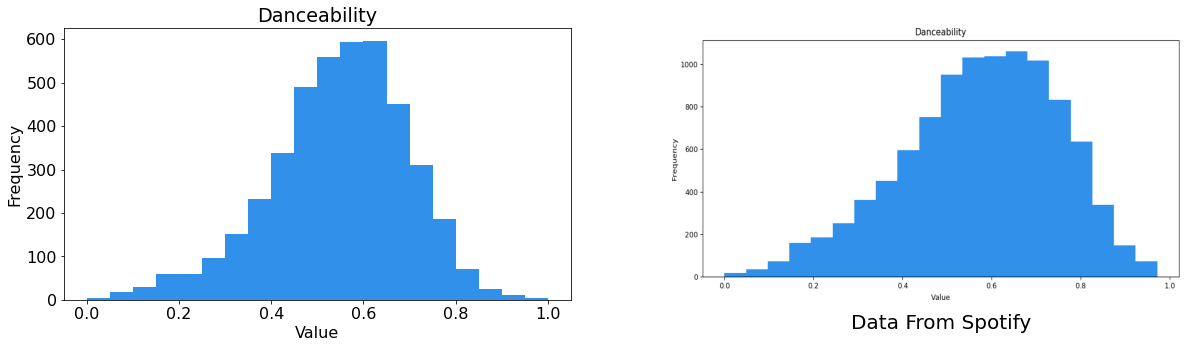

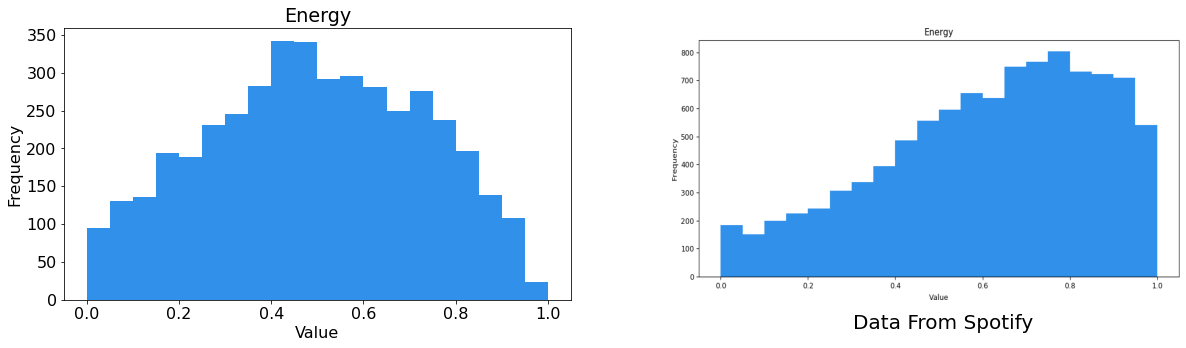

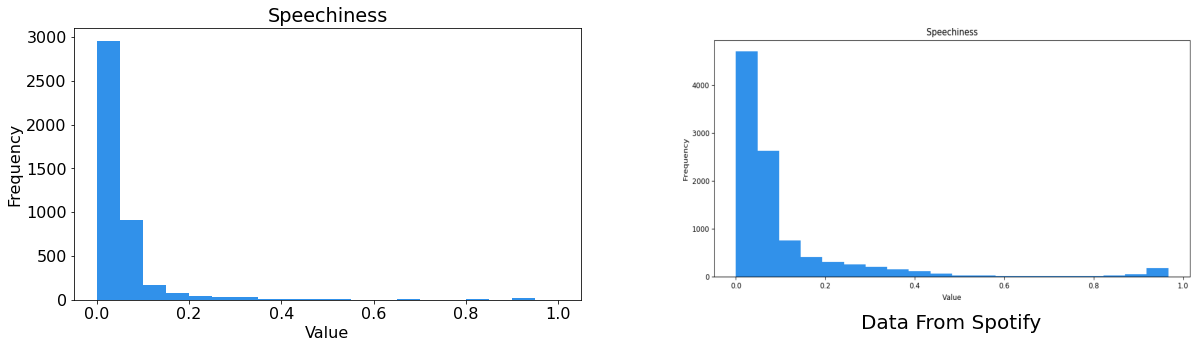

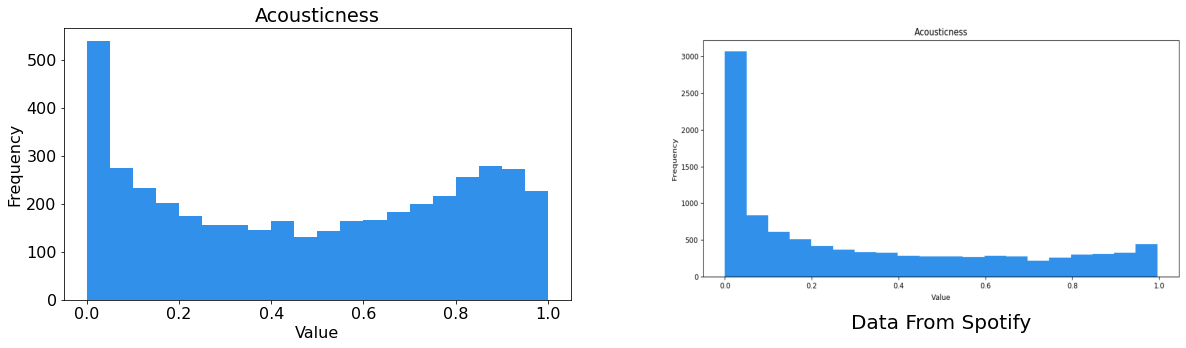

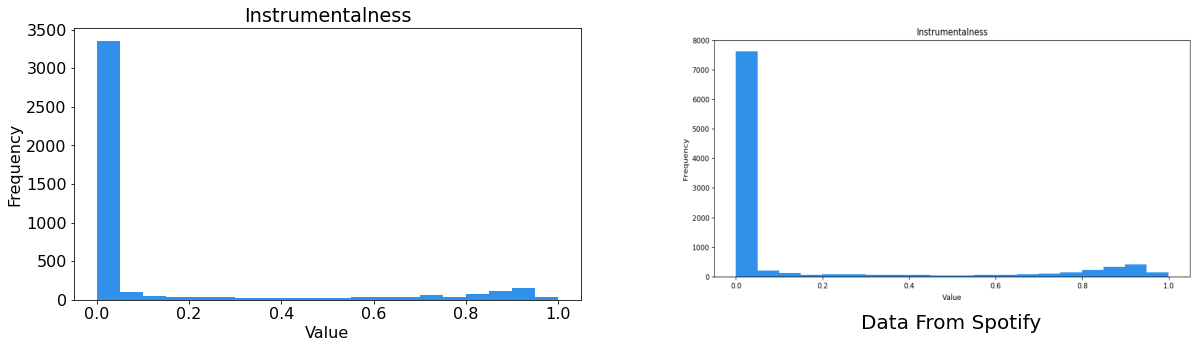

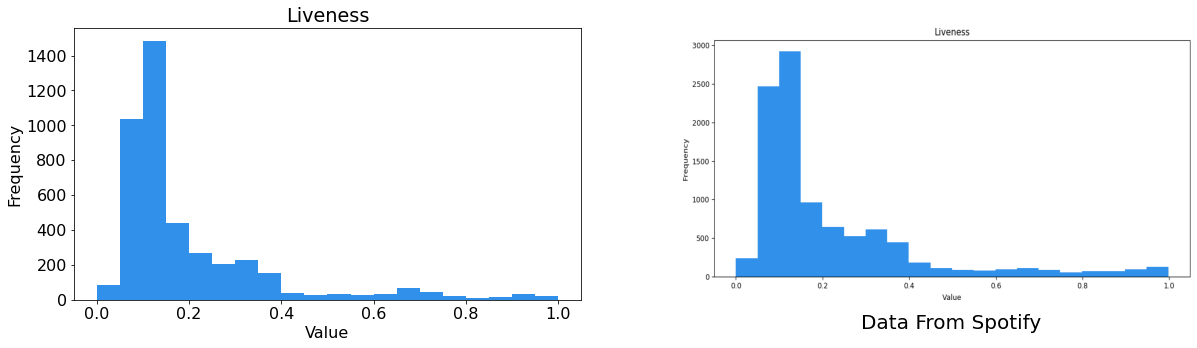

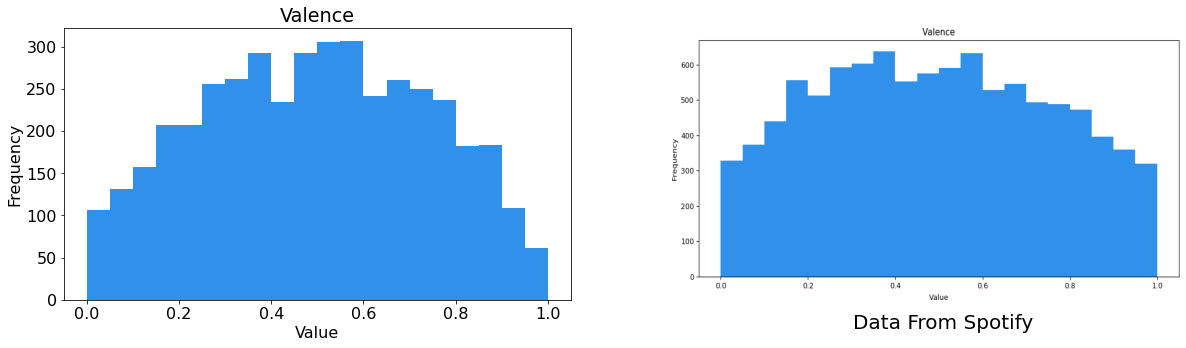

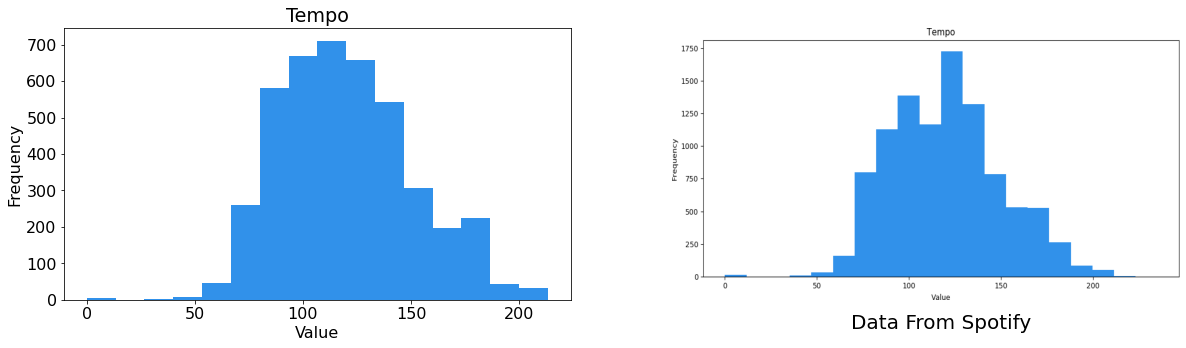

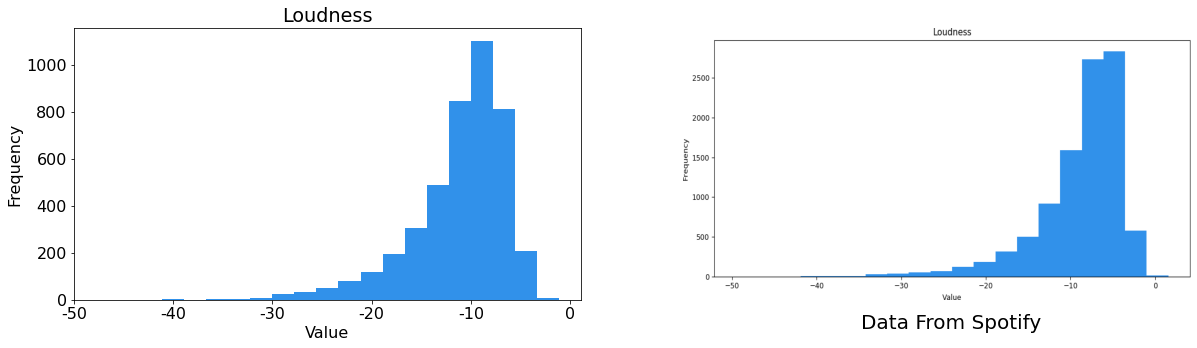

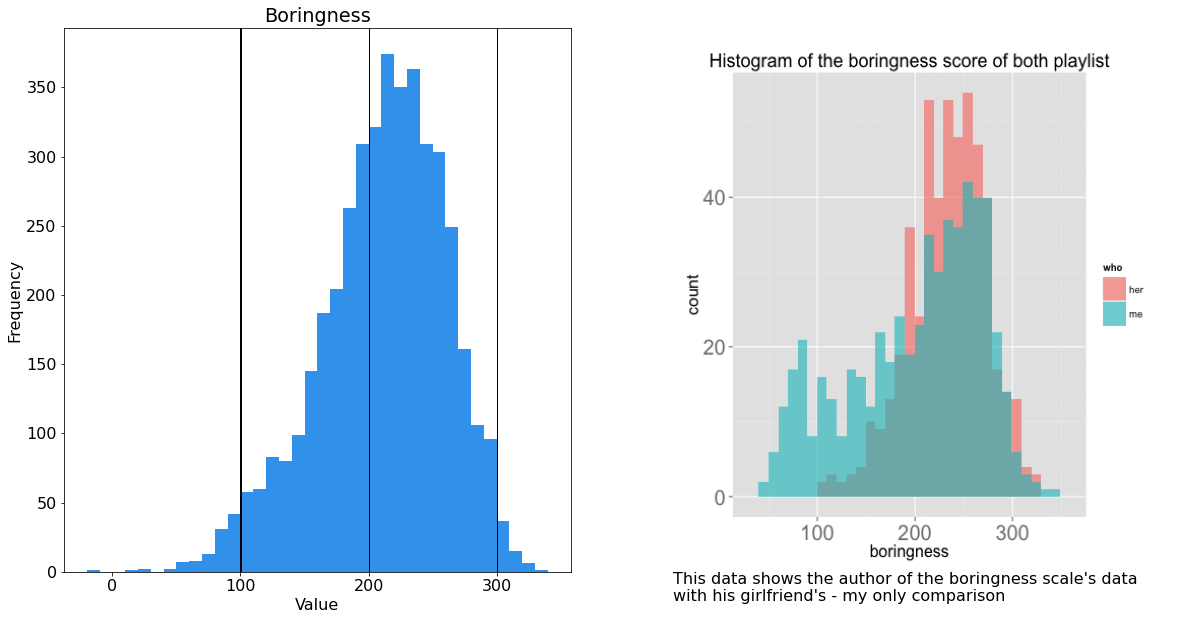

In [17]:
def graph_features(feature):
    def show_features(data):
        fig, ax = plt.subplots(1, 2, figsize=[20, 5] if feature != "boringness" else [20, 10])
        ax[0].bar(data[:,0], data[:,1], 1.0, align="edge" if feature != "loudness" else "center", color="#3191ea")
        img = mpimg.imread('res/' + feature + '.png')
        ax[1].imshow(img, aspect="auto")

        ax[0].set_title(feature[0].upper() + feature[1:])
        if feature == "tempo":
            ax[0].set_xticks([0, 3.75, 7.5, 11.25, 15])
            ax[0].set_xticklabels([0, 50, 100, 150, 200])
        elif feature == "loudness":
            ax[0].set_xticks([-22.5, -18, -13.5, -9, -4.5, 0])
            ax[0].set_xticklabels([-50, -40, -30, -20, -10, 0])
        elif feature == "boringness":
            ax[0].set_xticks([0, 10, 20, 30, 40])
            ax[0].set_xticklabels([0, 100, 200, 300, 400])
        else:
            ax[0].set_xticks([0, 4, 8, 12, 16, 20])
            ax[0].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax[0].set_xlabel("Value")
        ax[0].set_ylabel("Frequency")

        ax[1].axis("off")
        
        if feature == "boringness":
            ax[0].axvspan(10, 10.01, color="black", zorder=1)
            ax[0].axvspan(20, 20.01, color="black", zorder=1)
            ax[0].axvspan(30, 30.01, color="black", zorder=1)
            ax[1].text(0, 540, "This data shows the author of the boringness scale's data\nwith his girlfriend's - my only comparison")
        else:
            ax[1].text(525, 490, "Data From Spotify", ha="center", size=20)

    def get_bucket(row):
        if feature == "tempo":
            return row[feature] // 13
        elif feature == "loudness":
            return row[feature] // 2.2
        elif feature == "boringness":
            return row[feature] // 10
        return math.floor(row[feature] * 20)

    data = trimmed_tracks_data_df[["id", "count"]].drop_duplicates()
    data = data.merge(track_feature_data_df[["id", feature]], on="id").drop(columns=["id"])
    data["bucket"] = data.apply(get_bucket, axis=1)
    data = data.drop(columns=[feature]).groupby("bucket").count()
    data = data.reset_index().to_numpy()
    show_features(data)

    plt.show()

for feature in graphable_features:
    graph_features(feature)

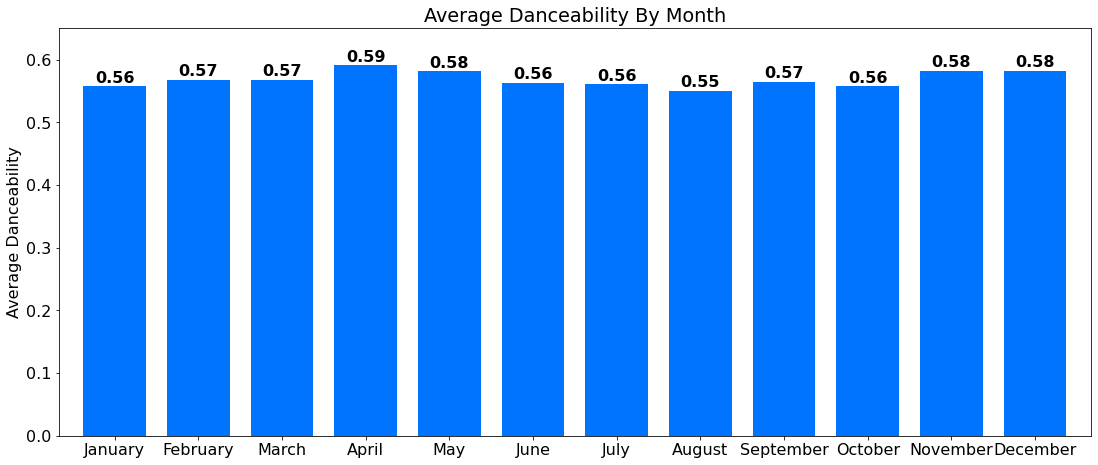

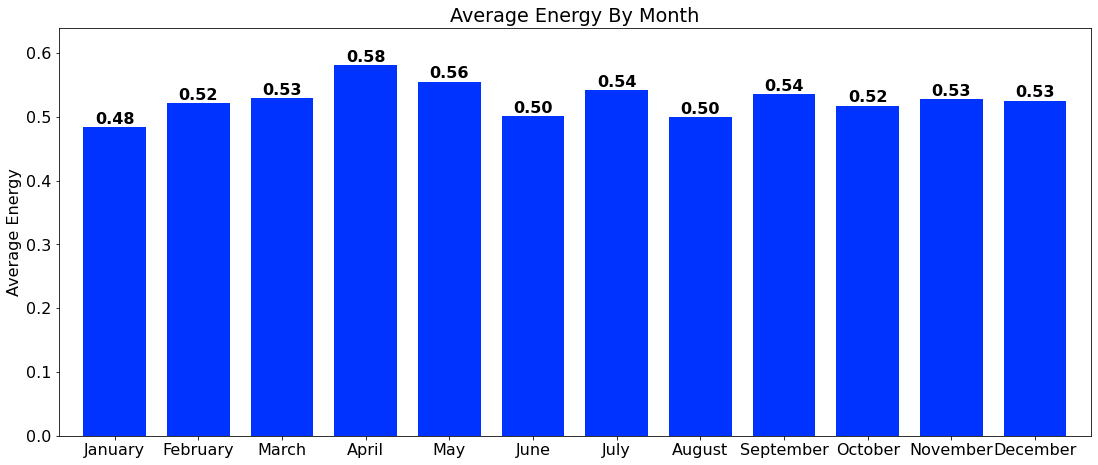

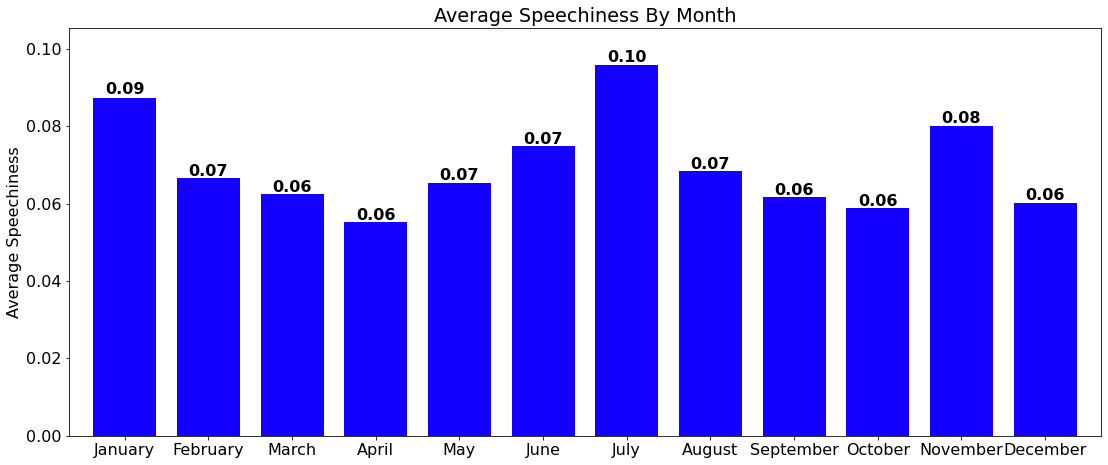

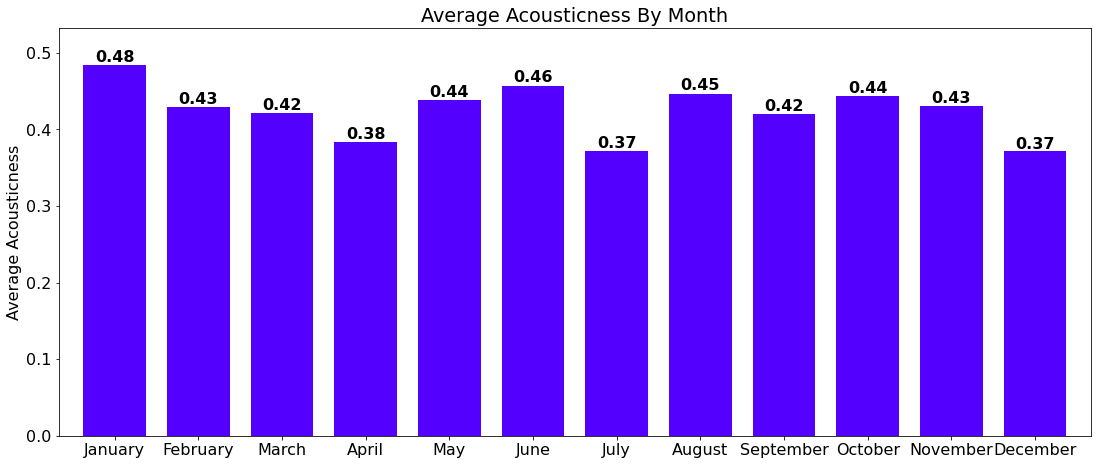

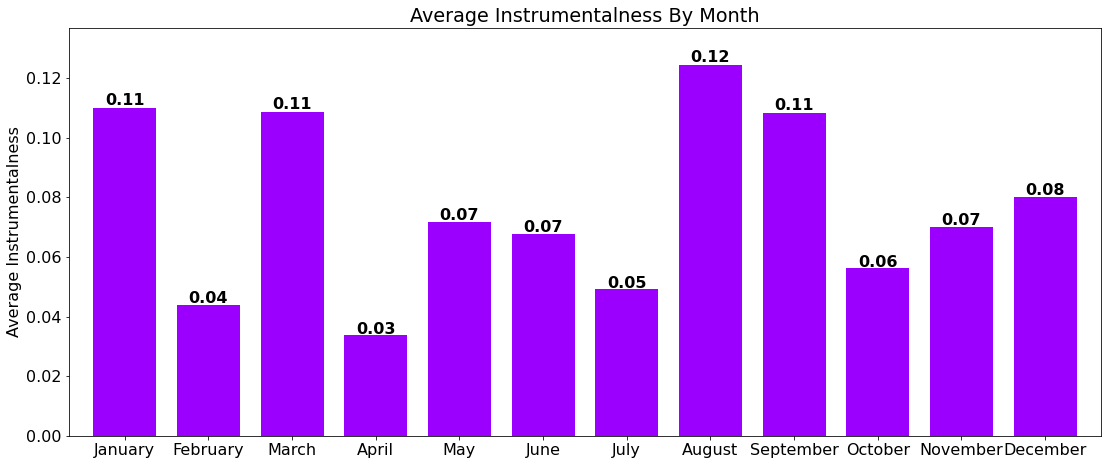

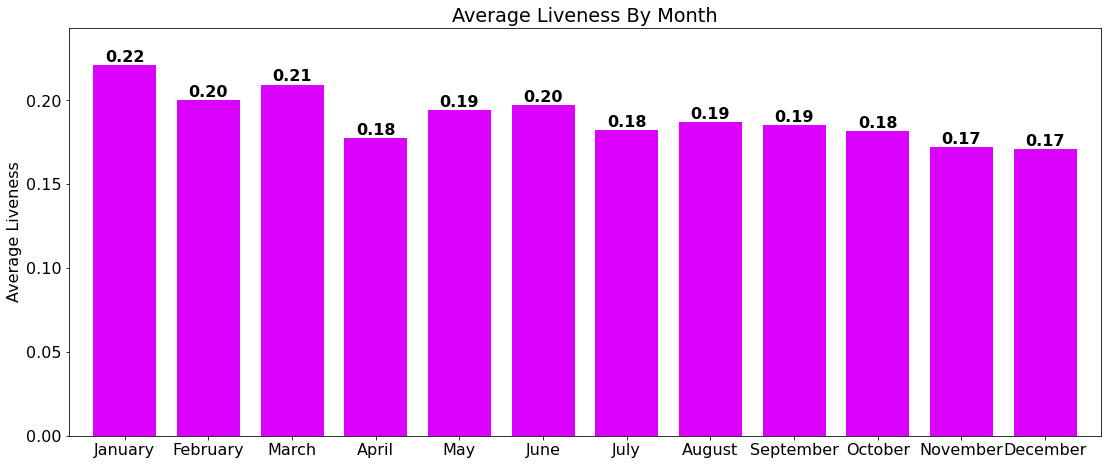

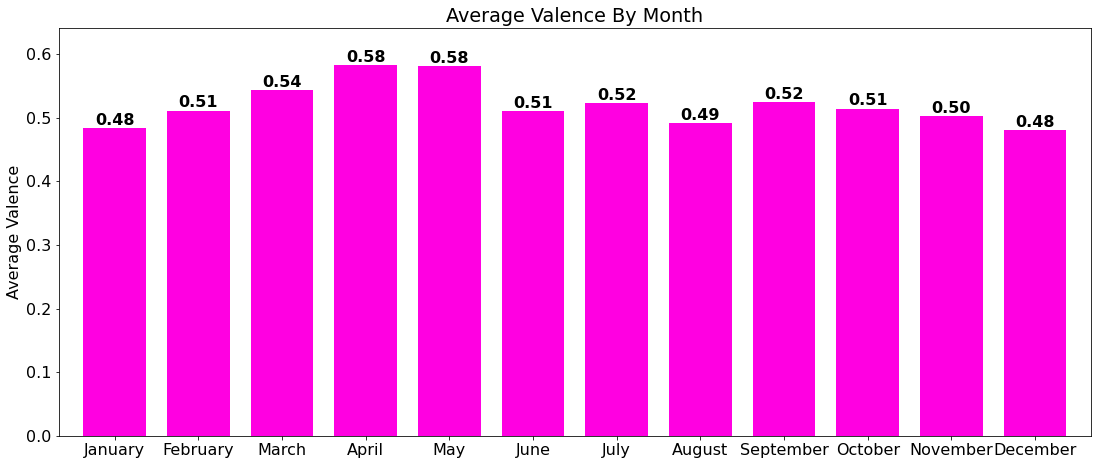

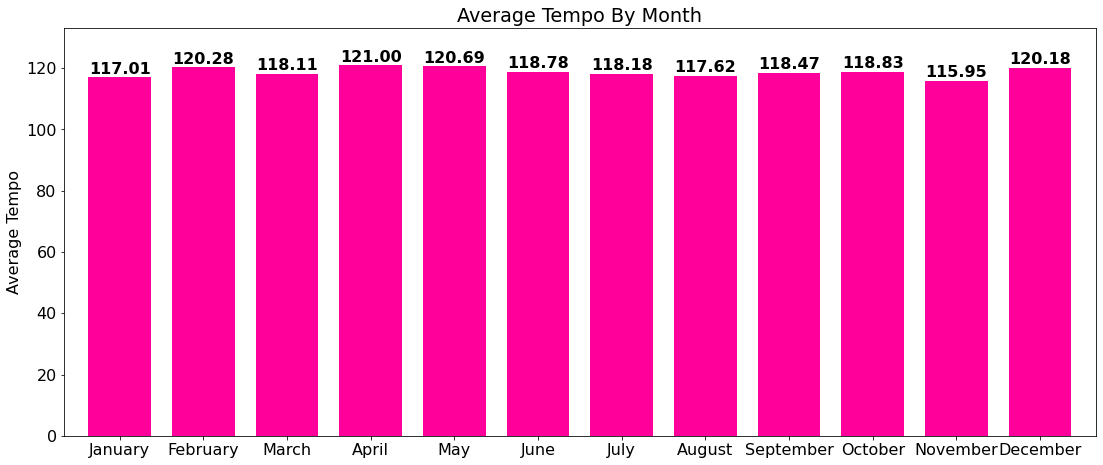

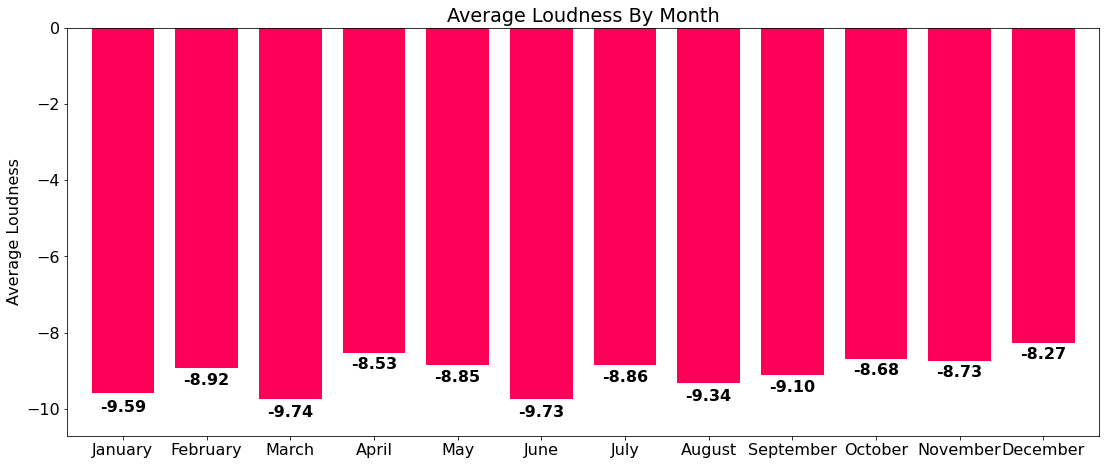

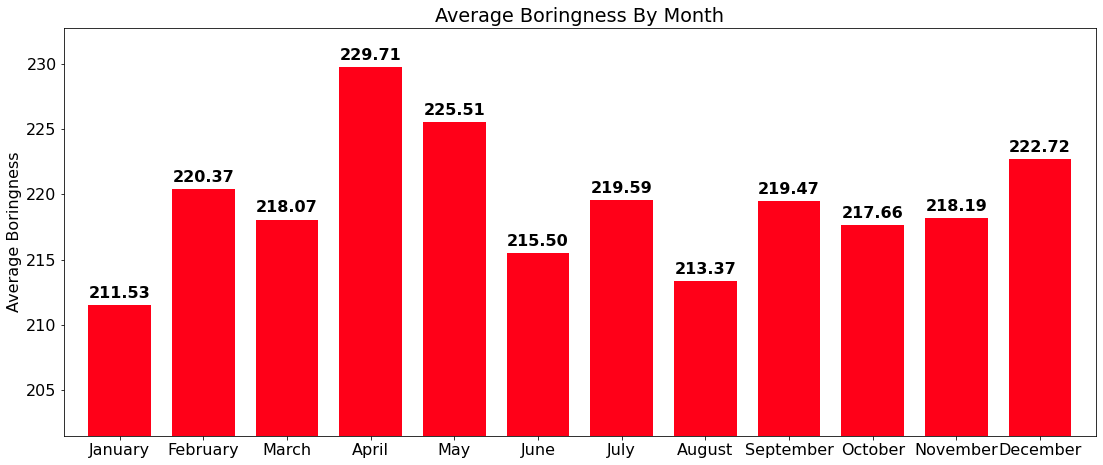

In [18]:
def graph_features_by_month(feature, color):
    def show_feature_by_month(data):
        fig, ax = plt.subplots()
        width = 0.75 # the width of the bars 
        ax.bar(data[:,0], data[:,1], width, color=color)
        for i, dance in enumerate(data[:,1]):
            ax.text(i + month_range[0], data[i,1] + (data[i,1] / ((100 if feature != "boringness" else 400) if feature != "loudness" else 20)), "{:.2f}".format(dance), color='black', fontweight='bold', ha="center")

        plt.title("Average {} By Month".format(feature[0].upper() + feature[1:]))
        plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[month_range[0] - 1:month_range[1]])
        plt.ylabel("Average {}".format(feature[0].upper() + feature[1:]))
        if feature == "boringness":
            plt.ylim([data[:,1].min()- 10, data[:,1].max() + 3])
        plt.margins(0.025, 0.1)

    data = trimmed_tracks_data_df[["month", "id"]].merge(track_feature_data_df[["id", feature]], on="id")
    data = data.drop(columns=["id"]).groupby(["month"]).mean()
    full_year_copy_df = full_year_df[["month", "ms_played"]].copy().drop_duplicates().rename({"ms_played": feature}, axis=1).set_index("month")
    full_year_copy_df.update(data)
    data = full_year_copy_df.reset_index().to_numpy()
    show_feature_by_month(data)

    plt.show()

colors = cm.hsv(np.linspace(0.6, 1.0, len(graphable_features)))
for i, feature in enumerate(graphable_features):
    graph_features_by_month(feature, colors[i])

/home/jcroderman/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


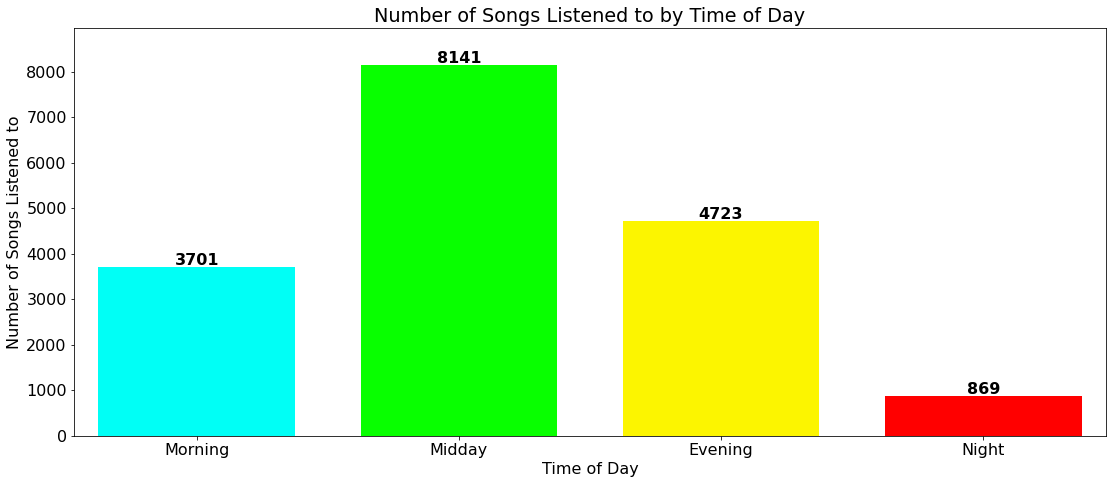

In [19]:
time_buckets = [
    "Morning", # [4:00AM, 10:00AM)
    "Midday", # [10:00AM, 4:00PM)
    "Evening", # [4:00PM, 10:00PM)
    "Night" # [10:00PM, 4:00AM)
]

def show_plays_by_time_of_day(data):
    fig, ax = plt.subplots()
    width = 0.75 # the width of the bars
    ax.bar(data[:,0], data[:,1], width, color=cm.hsv(np.linspace(0.5, 0, len(data))))
    for i, plays in enumerate(data[:,1]):
        ax.text(i, data[i,1] + 50, plays, color='black', fontweight='bold', horizontalalignment="center")
    
    plt.title("Number of Songs Listened to by Time of Day")
    plt.xticks(ticks=range(len(data)), labels=time_buckets)
    plt.xlabel("Time of Day")
    plt.ylabel("Number of Songs Listened to")
    plt.margins(0.025, 0.1)

def get_time_bucket(entry):
    hour = int(entry["time"][:2])
    if hour >= 4 and hour < 10:
        return 0
    elif hour >= 10 and hour < 16:
        return 1
    elif hour >= 16 and hour < 22:
        return 2
    return 3

tracks_time_of_day_df = trimmed_tracks_data_df[["time", "month", "id"]]
tracks_time_of_day_df["time_of_day"] = tracks_time_of_day_df.apply(get_time_bucket, axis=1)
data = tracks_time_of_day_df[["time_of_day", "id"]].groupby("time_of_day").count()
data = data.reset_index().to_numpy()
show_plays_by_time_of_day(data)

plt.show()

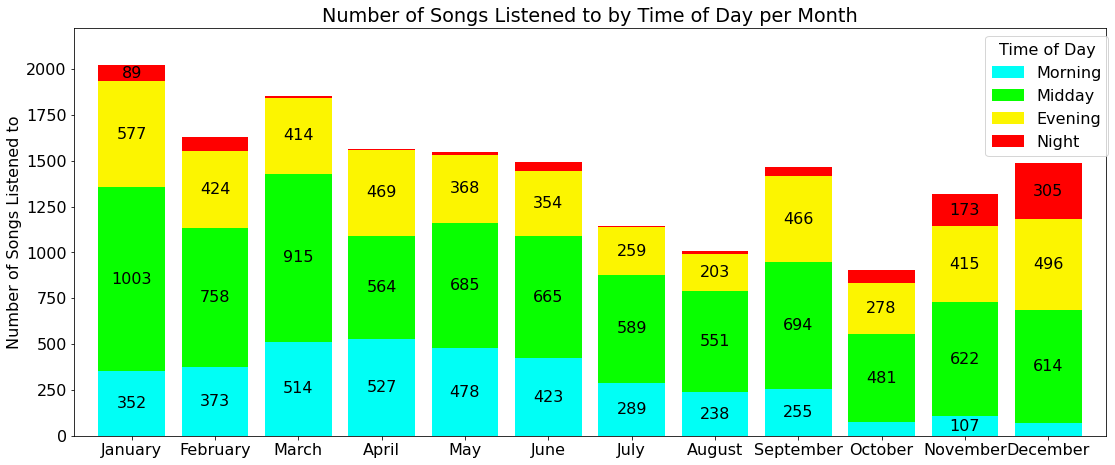

In [20]:
def show_plays_by_time_of_day_by_month(data):
    fig, ax = plt.subplots()

    bottom = (month_range[1] - month_range[0] + 1) * [0]
    color=cm.hsv(np.linspace(0.5, 0, len(time_buckets)))
    for time_of_day in range(len(time_buckets)):
        time_of_day_data = data[data["time_of_day"] == time_of_day].drop(columns=["time_of_day"], axis=1)
        for i in range(month_range[0], len(time_of_day_data) + 1):
            if time_of_day_data[time_of_day_data["month"] == i].shape[0] == 0:
                time_of_day_data = time_of_day_data.append({"month": i, "id": 0}, ignore_index=True)
        time_of_day_data = time_of_day_data.sort_values(by="month", ascending=True).to_numpy()
        for i, count in enumerate(time_of_day_data[:,1]):
            if count >= 80:
                ax.text(i + month_range[0], bottom[i] + (time_of_day_data[i,1] / 2), int(count), color='black', horizontalalignment='center', verticalalignment='center')
        ax.bar(time_of_day_data[:,0], time_of_day_data[:,1], label=time_buckets[time_of_day], bottom=bottom, color=color[time_of_day])
        bottom = bottom + time_of_day_data[:,1]

    plt.title("Number of Songs Listened to by Time of Day per Month")
    plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[month_range[0] - 1:month_range[1]])
    plt.ylabel("Number of Songs Listened to")
    plt.legend(title="Time of Day", bbox_to_anchor=(1.01, 1))
    plt.margins(0.025, 0.1)

data = tracks_time_of_day_df[["month", "time_of_day", "id"]].groupby(["month", "time_of_day"]).count()
temp = pd.DataFrame([[month, time_of_day, 0]
                    for month in range(month_range[0], month_range[1] + 1)
                    for time_of_day in range(0, 4)], columns=["month", "time_of_day", "id"]).set_index(["month", "time_of_day"])
temp.update(data)
data = temp.reset_index()
show_plays_by_time_of_day_by_month(data)

plt.show()

/home/jcroderman/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


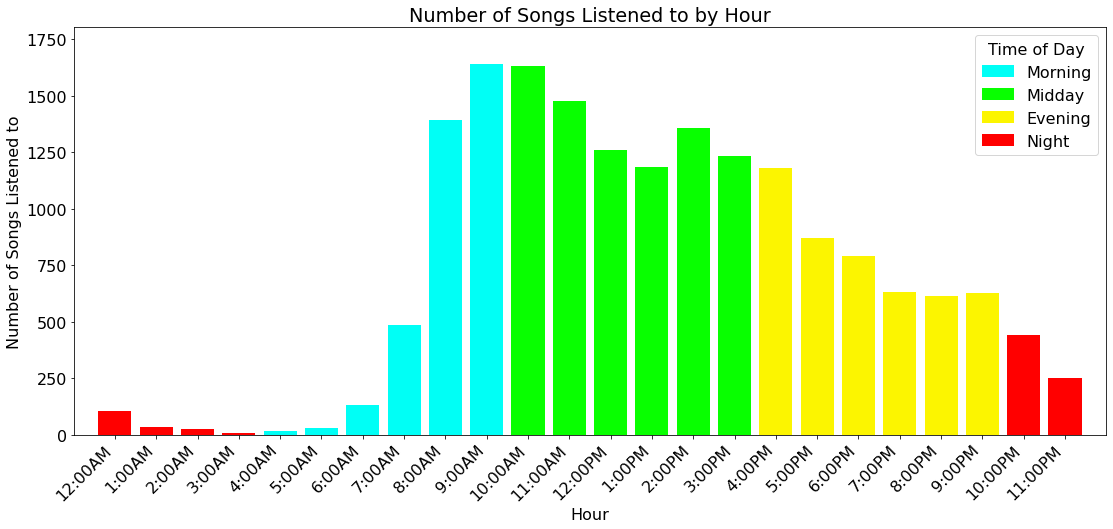

In [21]:
hours = ["12:00AM", "1:00AM", "2:00AM", "3:00AM", "4:00AM", "5:00AM", "6:00AM", "7:00AM", "8:00AM", "9:00AM", "10:00AM", "11:00AM",
         "12:00PM", "1:00PM", "2:00PM", "3:00PM", "4:00PM", "5:00PM", "6:00PM", "7:00PM", "8:00PM", "9:00PM", "10:00PM", "11:00PM"]

def show_plays_by_time_of_day_by_hour(data):
    fig, ax = plt.subplots()
    x = np.arange(0, len(time_buckets))
    color = cm.hsv(np.linspace(0.5, 0, len(time_buckets)))
    for time_of_day in range(len(time_buckets)):
        time_of_day_data = data[data["time_of_day"] == time_of_day].to_numpy()
        plt.bar(time_of_day_data[:,1], time_of_day_data[:,2], label=time_buckets[time_of_day], color=color[time_of_day])
    
    plt.title("Number of Songs Listened to by Hour")
    plt.xticks(ticks=range(len(hours)), labels=hours, rotation=45, ha='right')
    plt.xlabel("Hour")
    plt.ylabel("Number of Songs Listened to")
    plt.legend(title="Time of Day", loc=1)
    plt.margins(0.025, 0.1)

tracks_time_of_day_df["hour"] = tracks_time_of_day_df.apply(lambda entry: int(entry["time"][:2]), axis=1)
data = tracks_time_of_day_df[["time_of_day", "hour", "id"]].groupby(["time_of_day", "hour"]).count()
data = data.reset_index()
show_plays_by_time_of_day_by_hour(data)

plt.show()

In [22]:
counts_per_day_df = trimmed_tracks_data_df[["date", "id"]].groupby("date").count().reset_index().rename({"id": "count"}, axis=1)
highest_day = counts_per_day_df.sort_values(by="count", ascending=False).iloc[0]
print("Most songs listened to in one day: {} with {} songs".format(highest_day["date"], highest_day["count"]))

Most songs listened to in one day: 2021-12-18 with 140 songs


In [23]:
if not "count" in full_track_data_df:
    full_track_data_df = trimmed_tracks_data_df[["id", "count"]].drop_duplicates().merge(full_track_data_df, on="id")
print("Top Ten Tracks:")
full_track_data_df.sort_values(by="count", ascending=False)[["count", "name", "artist_names", "album_name"]].head(10).reset_index(drop=True)

Top Ten Tracks:


,count,name,artist_names,album_name
0,73,Getting Ready to Get Down,['Josh Ritter'],Sermon on the Rocks
1,65,The Feeling,['Sammy Rae & The Friends'],The Good Life
2,58,Biscuits,['Kacey Musgraves'],Pageant Material
3,55,Marietta,['Upstate'],Healing
4,55,Talk It Up,['Sammy Rae & The Friends'],The Good Life
5,53,So It Goes,"['Hi-Lo Jack', 'DAP The Contract', 'Lawrence',...",So It Goes
6,51,Slip Away,['Doc Robinson'],Deep End
7,50,End of the World,['Mingo Fishtrap'],On Time
8,49,Rocky Raccoon,"['Scary Pockets', 'George Krikes']",Nu Funk
9,49,Good Life,['Sammy Rae & The Friends'],The Good Life


In [24]:
print("Top Ten Tracks (from different albums):")
full_track_data_df.sort_values(by="count", ascending=False)[["count", "name", "artist_names", "album_name"]]\
    .drop_duplicates(subset=["album_name"], keep="first").head(10).reset_index(drop=True)

Top Ten Tracks (from different albums):


,count,name,artist_names,album_name
0,73,Getting Ready to Get Down,['Josh Ritter'],Sermon on the Rocks
1,65,The Feeling,['Sammy Rae & The Friends'],The Good Life
2,58,Biscuits,['Kacey Musgraves'],Pageant Material
3,55,Marietta,['Upstate'],Healing
4,53,So It Goes,"['Hi-Lo Jack', 'DAP The Contract', 'Lawrence',...",So It Goes
5,51,Slip Away,['Doc Robinson'],Deep End
6,50,End of the World,['Mingo Fishtrap'],On Time
7,49,Rocky Raccoon,"['Scary Pockets', 'George Krikes']",Nu Funk
8,48,Song In My Head,['Madison Cunningham'],Who Are You Now
9,47,If You're Gonna Ignite,['Doc Robinson'],If You're Gonna Ignite


In [25]:
top_tracks_by_month_df = trimmed_tracks_data_df[["month", "id", "date"]].groupby(["month", "id"]).count().reset_index().rename({"date": "count"}, axis=1)
top_tracks_by_month_df = top_tracks_by_month_df.merge(full_track_data_df[["id", "name", "album_id", "album_name", "artist_names"]], on="id")
print("Top Track Per Month:")
for month in range(month_range[0], month_range[1] + 1):
    month_data = top_tracks_by_month_df[top_tracks_by_month_df["month"] == month].sort_values(by="count", ascending=False)
    if month_data.shape[0] == 0:
        continue
    top_song = month_data.iloc[0]
    artists_str = " and ".join(eval(top_song["artist_names"]))
    print("{}: {} by {} with {} plays".format(months[month - 1], top_song["name"], artists_str, top_song["count"]))

Top Track Per Month:
January: Dissect the Bird (Live) by John Craigie with 22 plays
February: Utah Maid by Pixie and The Partygrass Boys with 19 plays
March: If You're Gonna Ignite by Doc Robinson with 25 plays
April: Getting Ready to Get Down by Josh Ritter with 34 plays
May: Talk It Up by Sammy Rae & The Friends with 38 plays
June: Got Mo Betta by Mingo Fishtrap and Ariel Posen and Delbert McClinton with 20 plays
July: In The Heights by Anthony Ramos and Lin-Manuel Miranda and Olga Merediz and Jimmy Smits and Daphne Rubin-Vega and Stephanie Beatriz and Dascha Polanco and Corey Hawkins and Gregory Diaz IV and Melissa Barrera with 12 plays
August: Slow and Steady by The Accidentals with 17 plays
September: Miracle by Caravan Palace with 17 plays
October: Not What I Have Done by The Whips and Erika Kolseth with 29 plays
November: Sarah by Upstate with 19 plays
December: Hypotheticals by Lake Street Dive with 32 plays


In [26]:
trimmed_tracks_mid_month_df = trimmed_tracks_data_df[["month", "id", "day", "date"]].copy()
trimmed_tracks_mid_month_df["mid_month"] = trimmed_tracks_mid_month_df.apply(lambda entry: entry["month"] + (1 if entry["day"] > 15 else 0), axis=1)
top_tracks_by_mid_month_df = trimmed_tracks_mid_month_df.groupby(["mid_month", "id"]).count().reset_index().rename({"date": "count"}, axis=1).drop(columns=["month", "day"], axis=1)
top_tracks_by_mid_month_df = top_tracks_by_mid_month_df.merge(full_track_data_df[["id", "name", "album_id", "album_name", "artist_names"]], on="id")

mid_months = list(map(lambda months: months[0] + ' - ' + months[1], zip([''] + months, months + [''])))
print("Top Track Per Mid-Month:")
for mid_month in range(month_range[0] + 1, month_range[1] + 1):
    mid_month_data = top_tracks_by_mid_month_df[top_tracks_by_mid_month_df["mid_month"] == mid_month].sort_values(by="count", ascending=False)
    if mid_month_data.shape[0] == 0:
        continue
    top_song = mid_month_data.iloc[0]
    artists_str = " and ".join(eval(top_song["artist_names"]))
    print("{}: {} by {} with {} plays".format(mid_months[mid_month - 1], top_song["name"], artists_str, top_song["count"]))

Top Track Per Mid-Month:
January - February: So It Goes by Hi-Lo Jack and DAP The Contract and Lawrence and Stolen Jars with 26 plays
February - March: Song In My Head by Madison Cunningham with 24 plays
March - April: Chattanooga by Doc Robinson with 21 plays
April - May: Biscuits by Kacey Musgraves with 35 plays
May - June: End of the World by Mingo Fishtrap with 18 plays
June - July: Give More by Scalise with 20 plays
July - August: Don't Lose Sight by Lawrence with 20 plays
August - September: Slow and Steady by The Accidentals with 13 plays
September - October: Not What I Have Done by The Whips and Erika Kolseth with 17 plays
October - November: Marietta by Upstate with 27 plays
November - December: Please [Feat Lucius] by Grace Potter and Lucius with 18 plays


In [27]:
# Note that this does not include multiple artist songs, I couldn't be bothered to figure that logic out
print("Top Ten Artists:")
trimmed_tracks_data_df_w_artists = trimmed_tracks_data_df[["date", "id"]].merge(full_track_data_df[["id", "artist_names"]], on="id")
trimmed_tracks_data_df_w_artists.groupby("artist_names").size().reset_index(name="count").sort_values(by="count", ascending=False).head(10).reset_index(drop=True)

Top Ten Artists:


,artist_names,count
0,['Doc Robinson'],929
1,['Lake Street Dive'],492
2,['The Ballroom Thieves'],446
3,['Sammy Rae & The Friends'],392
4,['Justin Hurwitz'],367
5,['Lawrence'],353
6,['Kacey Musgraves'],341
7,['Sam Burchfield'],324
8,['Dawes'],307
9,['Josh Ritter'],304


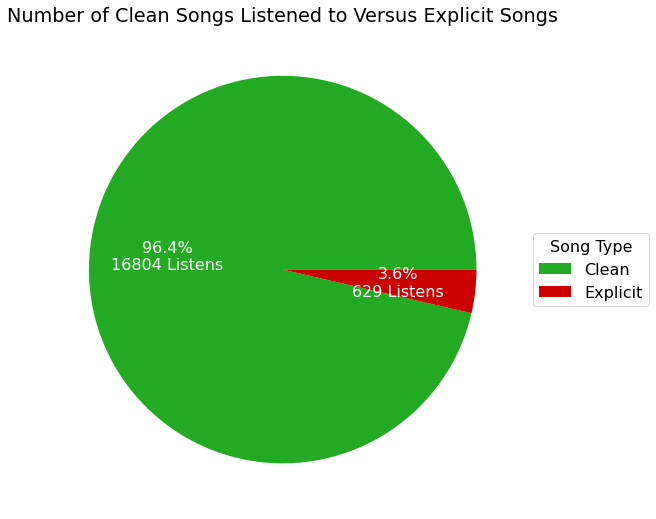

In [28]:
def show_explicit_pie_chart(data):
    fig, ax = plt.subplots()

    def label(pct, allvals):
        absolute = int(pct / 100 * np.sum(allvals))
        return "{:.1f}%\n{:d} Listens".format(pct, absolute)
    plt.pie(data[:,1], labels=["Clean", "Explicit"], autopct=lambda pct: label(pct, data[:,1]), colors=["#22aa22", "#cc0000"], textprops={"color": "w"})

    plt.title("Number of Clean Songs Listened to Versus Explicit Songs")
    plt.legend(title="Song Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.tight_layout()

data = trimmed_tracks_data_df[["id"]].merge(full_track_data_df[["id", "explicit"]], on="id")
data = data.groupby("explicit").size().reset_index(name="count").to_numpy()
show_explicit_pie_chart(data)

plt.show()

In [29]:
data = trimmed_tracks_data_df[["id", "count"]].drop_duplicates()
data = data.merge(full_track_data_df[["id", "explicit", "name", "album_name", "artist_names"]], on="id")
data = data[data["explicit"]]
print("Top Five Explicit Songs:")
data.sort_values(by="count", ascending=False).head(5).reset_index(drop=True)

Top Five Explicit Songs:


,id,count,explicit,name,album_name,artist_names
0,5PEIORAOmwjDV7OYzxHsvd,40,True,Don't Lose Sight,Hotel TV,['Lawrence']
1,5trUBvdu1TP6LcUjXFKMkf,40,True,Not What I Have Done,Not What I Have Done,"['The Whips', 'Erika Kolseth']"
2,1PA1XeyQfJJ05dFI0IANSd,36,True,Chattanooga,Ring of Love,['Doc Robinson']
3,0OMvb6n7NuFN2eSIw5U6JH,34,True,"It's Cool (We're Cool, Everything's Cool)",It's Cool,['Lula Wiles']
4,6IakZsqzSroni4hPfL9guN,29,True,Presidential Silver Lining (Live),Opening for Steinbeck (Live),['John Craigie']


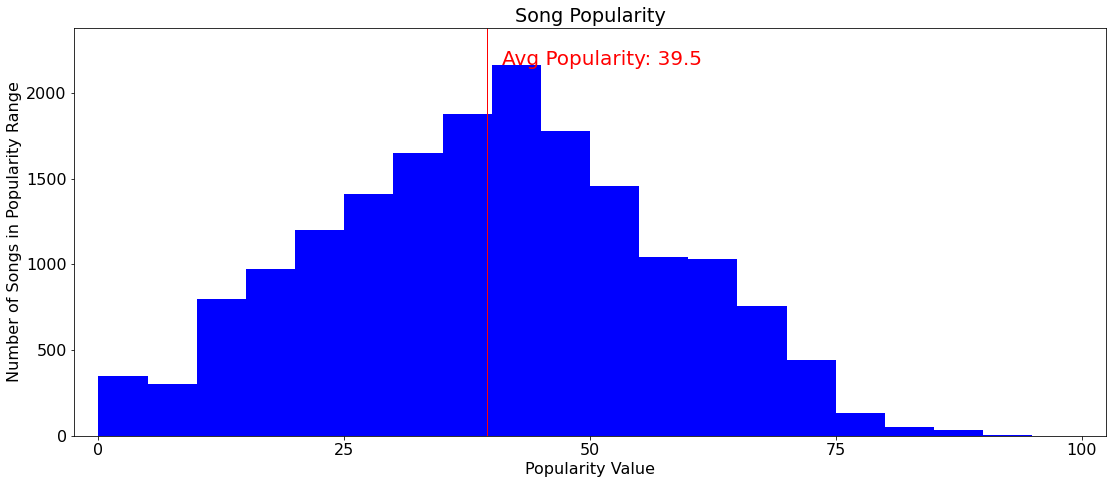

In [30]:
num_buckets = 20

def show_popularity(data, avg):
    fig, ax = plt.subplots()
    plt.bar(range(0, num_buckets), data, 1.0, align="edge", color="#0000ff")
    plt.title("Song Popularity")
    plt.xticks(ticks=list(map(lambda x: x * num_buckets / 4, range(0, 5))), labels=range(0, 125, 25))
    plt.xlabel("Popularity Value")
    plt.ylabel("Number of Songs in Popularity Range")
    avg_loc = avg / (100 / num_buckets)
    plt.axvspan(avg_loc, avg_loc + 0.01, color="red", zorder=1)
    plt.text(avg_loc + 0.3, max(data), "Avg Popularity: {:.1f}".format(avg), fontsize=20, color="red")
    plt.margins(0.025, 0.1)

empty_data = pd.DataFrame([[bucket, 0] for bucket in range(0, num_buckets)], columns=["bucket", "count"]).set_index("bucket")
data = trimmed_tracks_data_df[["id"]].merge(full_track_data_df[["id", "popularity"]], on="id")
avg = data["popularity"].mean()
data["bucket"] = data.apply(lambda entry: (int)(entry["popularity"] // (100 / num_buckets)), axis=1)
data = data.drop(columns=["popularity"], axis=1).groupby("bucket").size().reset_index(name="count").set_index("bucket")
empty_data.update(data)
data = empty_data.apply(lambda entry: (int)(entry), axis=1).to_numpy()
show_popularity(data, avg)

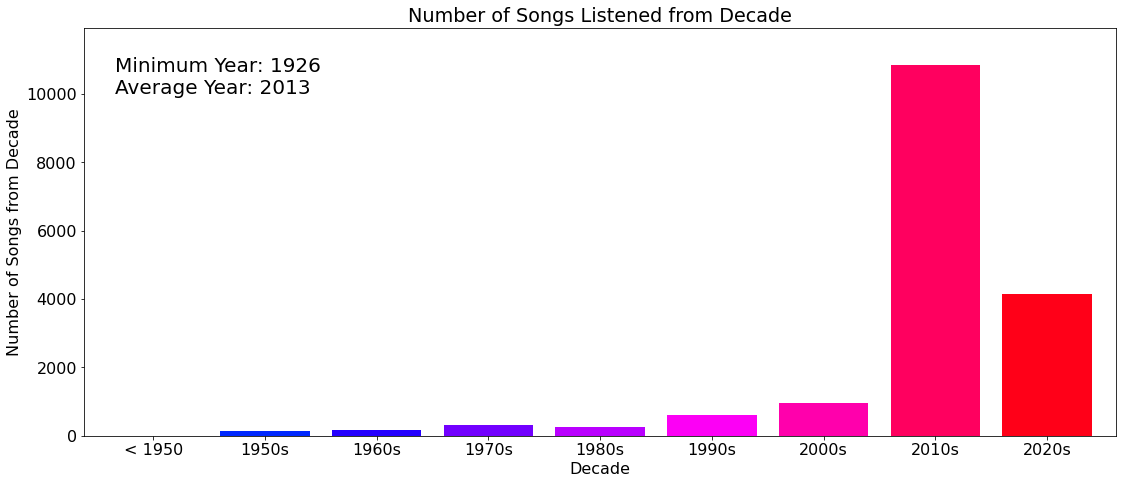

In [31]:
def show_per_decade(data, min_year, avg_year):
    fig, ax = plt.subplots()
    plt.bar(range(0, len(data)), data, color=cm.hsv(np.linspace(0.6, 1.0, len(data))))
    plt.title("Number of Songs Listened from Decade")
    plt.xticks(ticks=range(0, len(data)), labels=["< 1950"] + list(map(lambda year: str(year) + "s", range(1950, 2030, 10))))
    plt.xlabel("Decade")
    plt.ylabel("Number of Songs from Decade")
    text = "Minimum Year: {}\nAverage Year: {}".format(min_year, (int)(avg_year))
    plt.text(0.03, 0.93, text, fontsize=20, ha="left", va="top", transform=ax.transAxes)
    plt.margins(0.025, 0.1)

empty_data = pd.DataFrame([[decade, 0] for decade in range(1950, 2030, 10)], columns=["decade", "count"]).set_index("decade")
data = trimmed_tracks_data_df[["id"]].merge(full_track_data_df[["id", "album_release_date"]], on="id")
data["year"] = data.apply(lambda entry: (int)(entry["album_release_date"][:4]), axis=1)
min_year = data["year"].min()
avg_year = data["year"].mean()
data["decade"] = data.apply(lambda entry: (entry["year"] // 10) * 10, axis=1)
below = data[data["decade"] < 1950].shape[0]
data = data[data["decade"] >= 1950]
data = data.groupby("decade").size().reset_index(name="count").set_index("decade")
empty_data.update(data)
data = empty_data.apply(lambda entry: (int)(entry), axis=1).to_numpy()
data = np.append([below], data)
show_per_decade(data, min_year, avg_year)

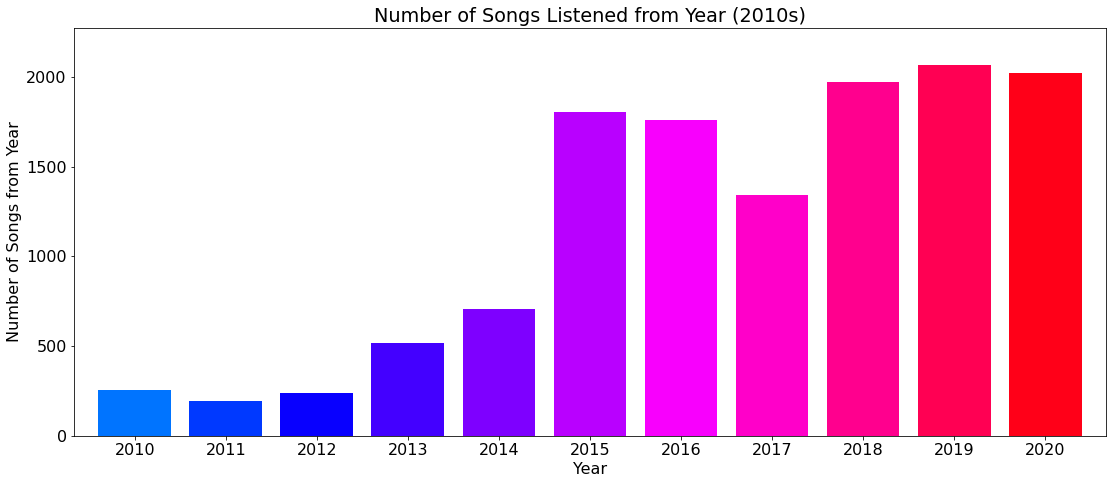

In [32]:
def show_2010_per_year(data):
    fig, ax = plt.subplots()
    plt.bar(range(0, len(data)), data, color=cm.hsv(np.linspace(0.6, 1.0, len(data))))
    plt.title("Number of Songs Listened from Year (2010s)")
    plt.xticks(ticks=range(0, len(data)), labels=range(2010, 2021))
    plt.xlabel("Year")
    plt.ylabel("Number of Songs from Year")
    plt.margins(0.025, 0.1)

empty_data = pd.DataFrame([[year, 0] for year in range(2010, 2021)], columns=["year", "count"]).set_index("year")
data = trimmed_tracks_data_df[["id"]].merge(full_track_data_df[["id", "album_release_date"]], on="id")
data["year"] = data.apply(lambda entry: (int)(entry["album_release_date"][:4]), axis=1)
data = data[data["year"] >= 2010]
data = data.groupby("year").size().reset_index(name="count").set_index("year")
empty_data.update(data)
data = empty_data.apply(lambda entry: (int)(entry), axis=1).to_numpy()
show_2010_per_year(data)

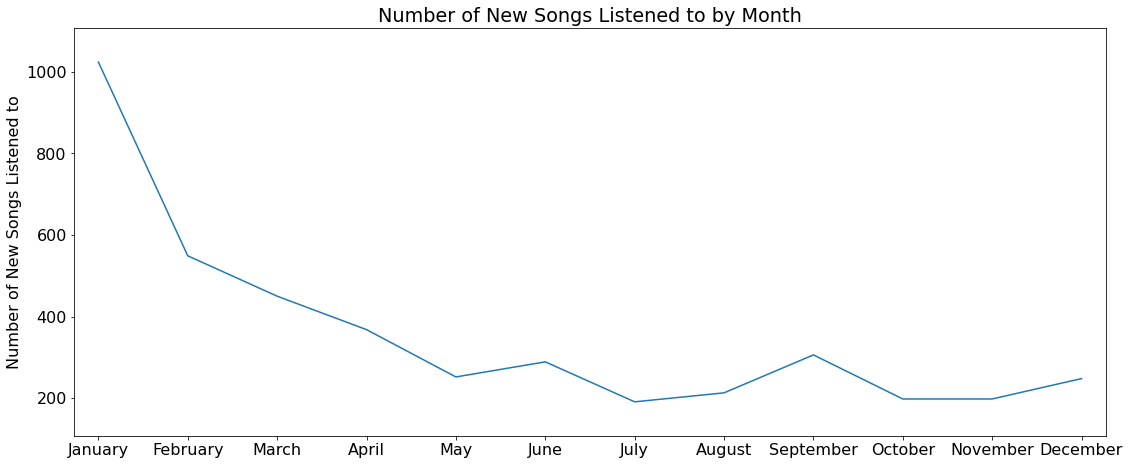

In [33]:
def show_new_plays_by_month(data):
    fig, ax = plt.subplots()
    plt.plot(data[:,0], data[:,1])
    plt.title("Number of New Songs Listened to by Month")
    plt.xticks(ticks=range(month_range[0], month_range[1] + 1), labels=months[month_range[0] - 1:month_range[1]])
    plt.ylabel("Number of New Songs Listened to")
    plt.margins(0.025, 0.1)

data = trimmed_tracks_data_df[["id", "month"]].drop_duplicates(subset="id", keep="first")
data = data.groupby("month").count()
full_year_copy_df = full_year_df[["month", "ms_played"]].copy().drop_duplicates().rename({"ms_played": "id"}, axis=1).set_index("month")
full_year_copy_df.update(data)
data = full_year_copy_df.reset_index().to_numpy()
show_new_plays_by_month(data)

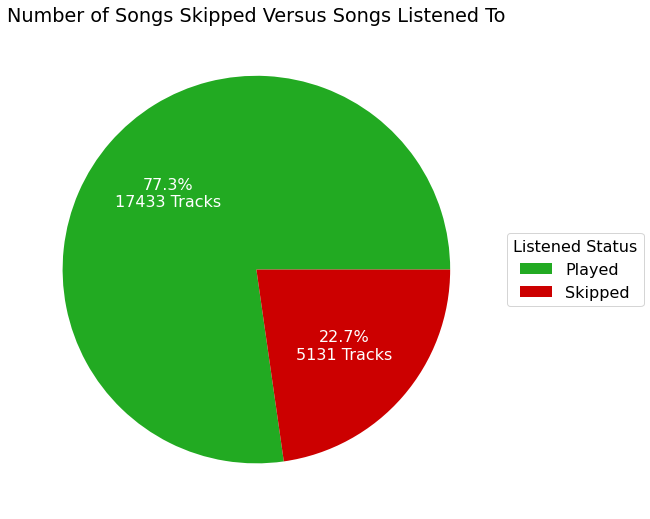

In [34]:
def show_new_pie_chart(data):
    fig, ax = plt.subplots()

    def label(pct, allvals):
        absolute = int(pct / 100 * np.sum(allvals))
        return "{:.1f}%\n{:d} Tracks".format(pct, absolute)
    plt.pie(data, labels=["Played", "Skipped"], autopct=lambda pct: label(pct, data), colors=["#22aa22", "#cc0000"], textprops={"color": "w"})

    plt.title("Number of Songs Skipped Versus Songs Listened To")
    plt.legend(title="Listened Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.tight_layout()

new_data_df = complete_streaming_history_df[complete_streaming_history_df["type"] == "track"]
new_data_df = new_data_df.merge(full_track_data_df[["id", "duration_ms"]], on="id")
played_tracks_df = new_data_df[new_data_df["ms_played"] > (new_data_df["duration_ms"] / 2)]
skipped_tracks_df = new_data_df[new_data_df["ms_played"] <= (new_data_df["duration_ms"] / 2)]
show_new_pie_chart([played_tracks_df.shape[0], skipped_tracks_df.shape[0]])

plt.show()

Let's check out podcast data!



In [35]:
trimmed_episodes_data_df = complete_streaming_history_df[complete_streaming_history_df["type"] == "episode"]
trimmed_episodes_data_total_listened = trimmed_episodes_data_df[["id", "ms_played"]].groupby("id").sum().reset_index().rename({"ms_played": "total_ms_played"}, axis=1)
trimmed_episodes_data_df = trimmed_episodes_data_df.merge(trimmed_episodes_data_total_listened, on="id")
trimmed_episodes_data_df = trimmed_episodes_data_df.sort_values(by=["id", "ms_played"]).reset_index(drop=True)
trimmed_episodes_data_df = trimmed_episodes_data_df.drop_duplicates("id", keep="last").drop(columns=["ms_played"], axis=1)
trimmed_episodes_data_df.head()

,date,time,type,id,month,day,total_ms_played
0,2021-10-17,18:39:00,episode,00Zd5ajE868yU9i04zbptx,10,17,1753542
2,2021-01-20,08:03:00,episode,017U9dNCtlKFeDmIOA9F2u,1,20,990425
4,2021-02-03,17:25:00,episode,01aNlS1o0zDPcxY3MeUl6t,2,3,800678
6,2021-10-20,18:04:00,episode,029iGIirZnTUnEBaTJ8Fgu,10,20,760400
7,2021-01-06,17:46:00,episode,02ChUxfsJrVHdKaSrxu80b,1,6,2219


In [36]:
trimmed_episodes_data_df = trimmed_episodes_data_df.merge(full_episode_data_df[["id", "duration_ms"]], on="id")
trimmed_episodes_data_df = trimmed_episodes_data_df[trimmed_episodes_data_df["total_ms_played"] > (trimmed_episodes_data_df["duration_ms"] / 2)]
trimmed_episodes_data_df = trimmed_episodes_data_df.sort_values(by=["date", "time"]).reset_index(drop=True)
print("Number of Unique Podcast Episodes Listened To: " + str(trimmed_episodes_data_df.shape[0]))
trimmed_episodes_data_df.head()

Number of Unique Podcast Episodes Listened To: 775


,date,time,type,id,month,day,total_ms_played,duration_ms
0,2021-01-01,10:46:00,episode,4vqMyjMPaLZc06BBSzBEk3,1,1,3354566,3318569
1,2021-01-02,19:37:00,episode,3L7WxMTjXmSzhGncCUIIJ6,1,2,6068426,4258926
2,2021-01-03,13:27:00,episode,5uqoeTTKOPlXKkcNGrSMpb,1,3,4064359,4064235
3,2021-01-03,18:42:00,episode,50FHng0614l7nSY1AK9se6,1,3,3624745,3681149
4,2021-01-04,09:11:00,episode,5ZTFagHMXjkDpUPv1prrAC,1,4,851161,836598


In [37]:
trimmed_episodes_with_show = trimmed_episodes_data_df[["id", "total_ms_played"]].merge(full_episode_data_df[["id", "show_name"]], on="id")
print("Top Podcast Shows By Number of Unique Episodes Listened To:")
trimmed_episodes_with_show.groupby("show_name").size().reset_index(name="count").sort_values(by="count", ascending=False).reset_index(drop=True).head(10)

Top Podcast Shows By Number of Unique Episodes Listened To:


,show_name,count
0,Consider This from NPR,186
1,Short Wave,155
2,You're Wrong About,60
3,The Daily,46
4,The NPR Politics Podcast,36
5,Science Vs,34
6,How to Save a Planet,31
7,The Gus & Eddy Podcast,31
8,Darknet Diaries,25
9,Game Scoop!,20


In [38]:
print("Top Podcast Shows By Time Spent Listening:")
trimmed_episodes_with_show.groupby("show_name").sum().reset_index().sort_values(by="total_ms_played", ascending=False).reset_index(drop=True).head(10)

Top Podcast Shows By Time Spent Listening:


,show_name,total_ms_played
0,You're Wrong About,242314378
1,Consider This from NPR,189588303
2,The Gus & Eddy Podcast,122652598
3,Short Wave,119095676
4,Darknet Diaries,94072086
5,The Daily,82834175
6,How to Save a Planet,75436454
7,Game Scoop!,73030283
8,Science Vs,51664402
9,Reply All,41884794


# Conclusion

I may add more graphs when I feel like it, but for now, this is my Spotify data! This was a project that I expected to take a week and ended up taking 4 months, but it is by far one of the proudest projects I have made. Thanks for checking it out! If you're interested in doing this yourself, simply pull down the repository and run your own data! You can find instructions to download it [here](https://www.makeuseof.com/tag/download-privacy-data-spotify/). If you have questions, feel free to shoot me a message!